In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv("historical_sectors.csv", low_memory=False)

df.dropna(axis=0, inplace=True)
df.head(5000)

,DATE,XLE_CLOSE,XLE_VOL,XLE_SMA_200,XLE_EMA_100,XLE_MACD,XLE_RSI,XLE_CCI,XLE_STOCH,XLE_LBB,...,CPIENGSL,H8B1058NCBCMG,TOTALSA,JTSJOL,MEDIAN_CPI,TB3SMFFM,T10YIEM,EXPINF2YR,CSUSHPINSA,UMCSENT
0,1/3/2006,31.9065,24190200,28.2759,29.9028,0.1311,60.2638,69.0318,43.9043,29.4094,...,196.60,9.0,18.08,4397,2.88,-0.05,2.41,2.43,180.83,91.2
1,1/4/2006,31.9973,19997900,28.3056,29.9443,0.2062,60.9163,122.0506,70.3419,29.5759,...,196.60,9.0,18.08,4397,2.88,-0.05,2.41,2.43,180.83,91.2
2,1/5/2006,31.5916,23561000,28.3349,29.9769,0.2304,56.4563,96.3993,88.0642,29.8227,...,196.60,9.0,18.08,4397,2.88,-0.05,2.41,2.43,180.83,91.2
3,1/6/2006,32.3666,18145900,28.3705,30.0242,0.3085,62.1567,170.0392,90.1963,30.3621,...,196.60,9.0,18.08,4397,2.88,-0.05,2.41,2.43,180.83,91.2
4,1/9/2006,32.3302,15235200,28.4060,30.0699,0.3633,61.7485,139.5576,88.8662,31.4646,...,196.60,9.0,18.08,4397,2.88,-0.05,2.41,2.43,180.83,91.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4336,3/27/2023,78.8554,20111900,79.9468,82.6998,-1.9117,44.6214,-8.2366,32.8621,76.0724,...,280.96,-16.8,15.40,9745,4.91,0.04,2.30,2.20,297.14,62.0
4337,3/28/2023,80.0747,16298400,79.9186,82.6478,-1.6587,48.2975,42.2167,43.0645,75.9071,...,280.96,-16.8,15.40,9745,4.91,0.04,2.30,2.20,297.14,62.0
4338,3/29/2023,81.1849,18102300,79.9032,82.6188,-1.3530,51.4573,104.3136,59.3835,75.5739,...,280.96,-16.8,15.40,9745,4.91,0.04,2.30,2.20,297.14,62.0
4339,3/30/2023,81.5418,13730400,79.9115,82.5975,-1.0697,52.4629,129.1317,75.9825,76.5954,...,280.96,-16.8,15.40,9745,4.91,0.04,2.30,2.20,297.14,62.0


In [17]:
# Convert the date column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Set the date column as the index
df.set_index('DATE', inplace=True)

(4341, 142)


### 1. XLE

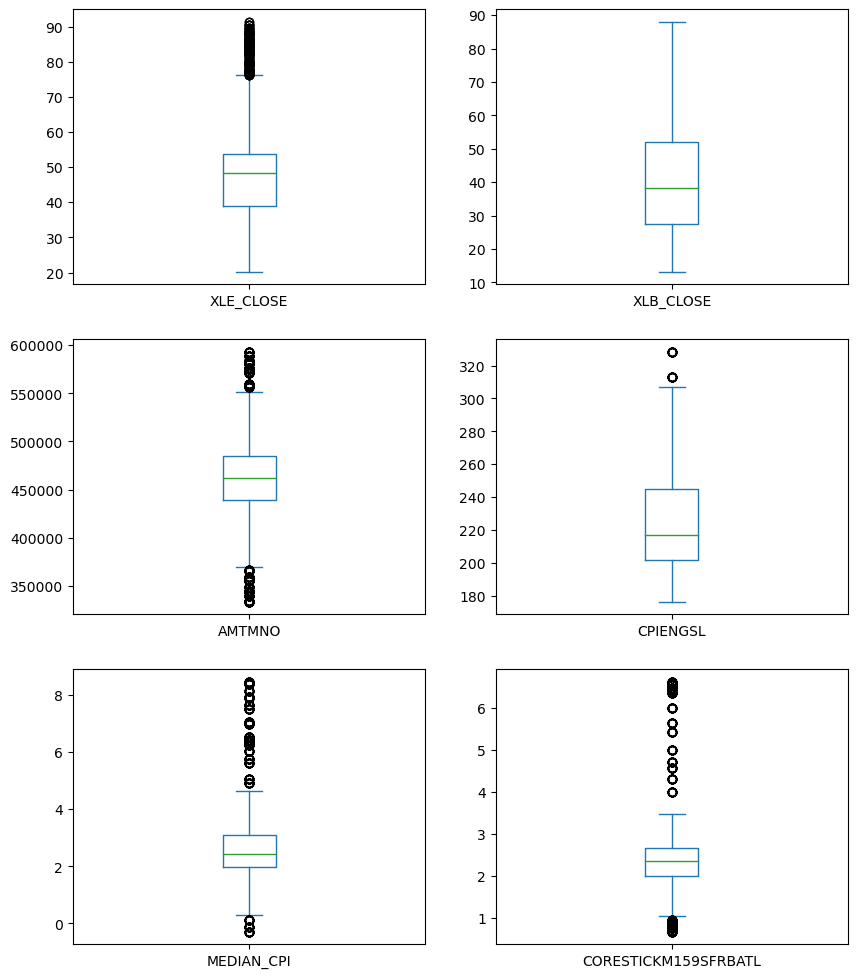

In [60]:
#Box and whisker plots of variation in data
df_XLE = df[['XLE_CLOSE', 'XLB_CLOSE', 'AMTMNO', 'CPIENGSL', 'MEDIAN_CPI', 'CORESTICKM159SFRBATL']]
df_XLE.plot(kind='box', subplots=True, layout=(6,2), figsize=(10,25), sharex=False, sharey=False)
plt.show()

In [51]:
# Features (X1) and target variable (y1) split
X1 = df[['XLB_CLOSE', 'AMTMNO', 'CPIENGSL', 'MEDIAN_CPI', 'CORESTICKM159SFRBATL']]
y1 = df['XLE_CLOSE']

print(X1.shape)
print(y1.shape)

(4341, 5)
(4341,)


In [37]:
#Train-Test Split of 30%
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, 
                                                    random_state=100, shuffle=False)

print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(3038, 5)
(1303, 5)
(3038,)
(1303,)


In [46]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc_X1_train = MinMaxScaler()
sc_X1_test = MinMaxScaler()

X1_train_scaled = sc_X1_train.fit_transform(X1_train)
X1_test_scaled = sc_X1_test.fit_transform(X1_test)

print(X1_train_scaled.shape)
print(X1_test_scaled.shape)
print(y1_train.shape)
print(y1_test.shape)

(3038, 5)
(1303, 5)
(3038,)
(1303,)


In [47]:
# Train the model
model = SVR(kernel='rbf', C=4, epsilon=0.1)
svr = model.fit(X1_train_scaled, y1_train)

In [48]:
y1_pred = svr.predict(X1_test_scaled)

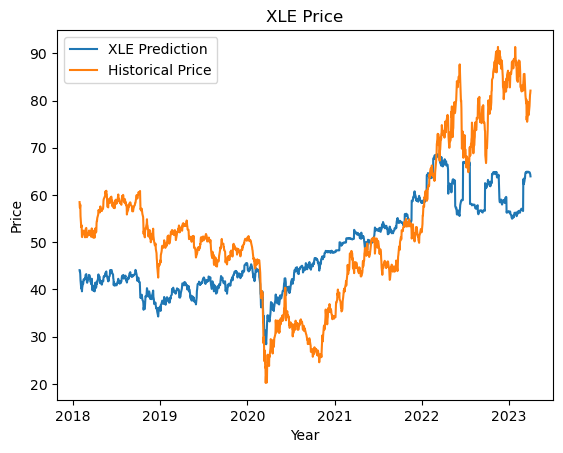

In [49]:
plt.plot(y1_test.index, y1_pred, label='XLE Prediction')
plt.plot(y1_test.index, y1_test, label='Historical Price')
plt.title('XLE Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(loc='best')

In [50]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2_XLE = r2_score(y1_test, y1_pred)
mse_XLE = mean_squared_error(y1_test, y1_pred)

print("R2 score:", r2_XLE)
print("MSE:", mse_XLE)

R2 score: 0.31124687062672585
MSE: 174.73460997674806


### 2. XLB

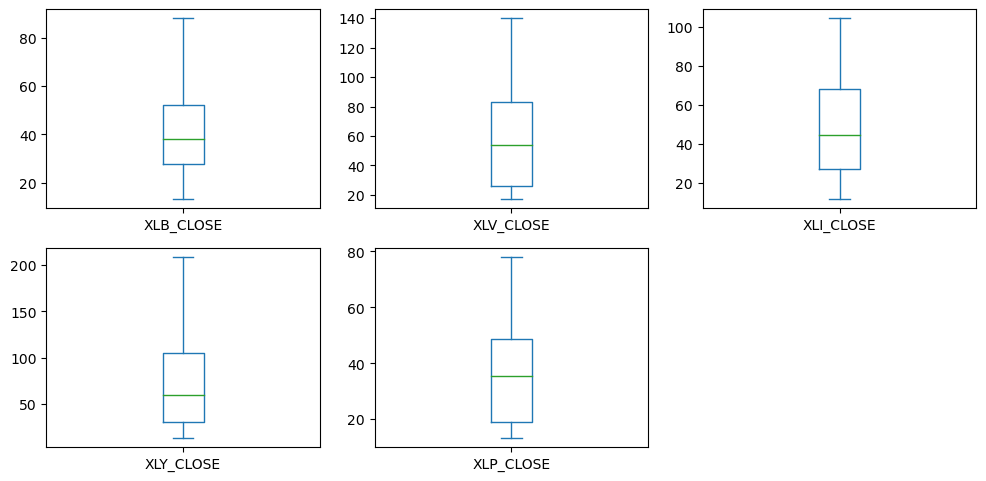

In [66]:
#Box and whisker plots of variation in data
df_XLB = df[['XLB_CLOSE', 'XLV_CLOSE', 'XLI_CLOSE', 'XLY_CLOSE', 'XLP_CLOSE']]
df_XLB.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,15), sharex=False, sharey=False)
plt.show()

In [52]:
X2 = df[['XLV_CLOSE', 'XLI_CLOSE', 'XLY_CLOSE', 'XLP_CLOSE']]
y2 = df['XLB_CLOSE']

print(X2.shape)
print(y2.shape)

(4341, 4)
(4341,)


In [53]:
#Train-Test Split of 30%
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, 
                                                    random_state=100, shuffle=False)

print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(3038, 4)
(1303, 4)
(3038,)
(1303,)


In [55]:
# Feature Scaling
sc_X2_train = MinMaxScaler()
sc_X2_test = MinMaxScaler()

X2_train_scaled = sc_X2_train.fit_transform(X2_train)
X2_test_scaled = sc_X2_test.fit_transform(X2_test)

print(X2_train_scaled.shape)
print(X2_test_scaled.shape)
print(y2_train.shape)
print(y2_test.shape)

(3038, 4)
(1303, 4)
(3038,)
(1303,)


In [56]:
# Train the model
model2 = SVR(kernel='rbf', C=4, epsilon=0.1)
svr2 = model2.fit(X2_train_scaled, y2_train)

In [57]:
y2_pred = svr2.predict(X2_test_scaled)

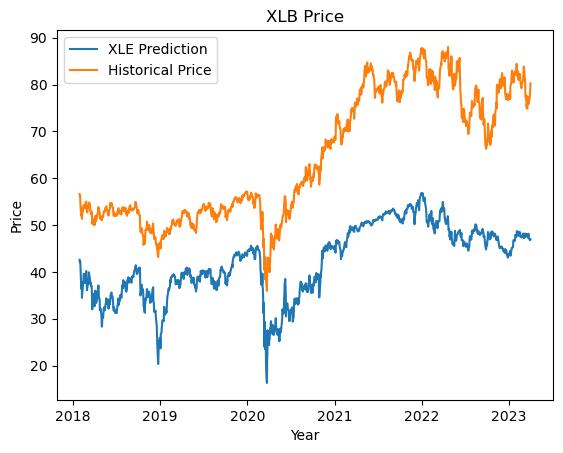

In [58]:
plt.plot(y2_test.index, y2_pred, label='XLE Prediction')
plt.plot(y2_test.index, y2_test, label='Historical Price')
plt.title('XLB Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(loc='best')

In [59]:
r2_XLB = r2_score(y2_test, y2_pred)
mse_XLB = mean_squared_error(y2_test, y2_pred)

print("R2 score:", r2_XLB)
print("MSE:", mse_XLB)

R2 score: -1.965181539933479
MSE: 547.6314755359798
